Gustavo Gobetti Bertocco
2 - C

___
# MINIPROJETO 1

Variável escolhida : Distribuição de salários em São Francisco

___
### Itens 1 a 3 - Resolução:

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gustavo\Documents\INSPER\2 semestre Engenharia\Ciência dos Dados\output


In [3]:
dados = pd.read_csv('Salaries.csv')

C:\Users\Gustavo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
salario = dados["TotalPay"]

In [5]:
salario.describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [6]:
faixa = np.arange(0, 270000,1000)
variavelCateg = pd.cut(salario,faixa)
variavelCateg.value_counts()

(0, 1000]           3225
(1000, 2000]        2320
(2000, 3000]        2251
(3000, 4000]        1997
(4000, 5000]        1581
(60000, 61000]      1579
(72000, 73000]      1533
(61000, 62000]      1527
(66000, 67000]      1506
(7000, 8000]        1472
(73000, 74000]      1423
(5000, 6000]        1418
(58000, 59000]      1409
(68000, 69000]      1407
(71000, 72000]      1400
(57000, 58000]      1398
(56000, 57000]      1392
(65000, 66000]      1390
(75000, 76000]      1387
(8000, 9000]        1384
(62000, 63000]      1370
(59000, 60000]      1357
(67000, 68000]      1352
(74000, 75000]      1345
(69000, 70000]      1331
(63000, 64000]      1326
(70000, 71000]      1324
(9000, 10000]       1322
(78000, 79000]      1321
(76000, 77000]      1318
                    ... 
(250000, 251000]      14
(242000, 243000]      13
(244000, 245000]      13
(240000, 241000]      13
(238000, 239000]      12
(246000, 247000]      12
(252000, 253000]      12
(241000, 242000]      12
(243000, 244000]      11


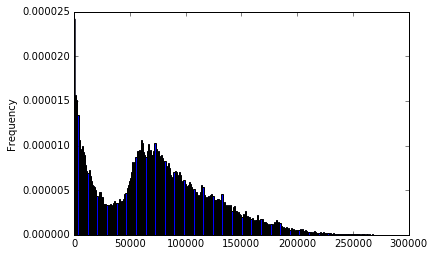

In [7]:
salario.plot.hist(bins = faixa,normed = 1)

    Para analisarmos este conjunto de dados vamos fazer uma retomada do que deve ser levado em consideração para dizer qual é a melhor distribuição teórica. Pegando a média, mediana e moda, é possível observar se o modelo pode ser considerado simétrico, assimétrico positivo ou assimétrico negativo. Como a média vale: 74763.32, a mediana: 71426.61, e a moda está entre 0 e 1000, pode-se dizer que o melhor modelo que representa esta curva é a assimetria positiva. Pois, através dos dados, percebe-se que: média>mediana>moda. O que caracteriza uma assimetria positiva(com a cauda indo à direita).
    No entanto, é importante lembrar que esse gráfico não representa fielmente uma curva assimétrica positiva, mas os modelos que utilizaremos serão para tal: Poisson e distribuição gama.

___
### Itens 4 a 6 - Resolução:

Exemplo de resolução para Poisson - Assimetria Positiva.

In [8]:
s = np.random.poisson(5, 1000)

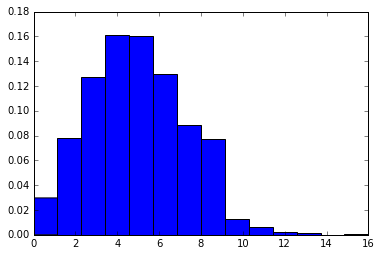

In [9]:

count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()

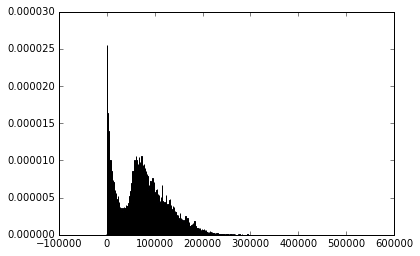

In [10]:
count, bins, ignored = plt.hist(salario, 1000, normed=True)
plt.show()

Relembrando que este modelo é uma aproximação, vide o fato de não existir um modelo específico para o formato do histograma principal.

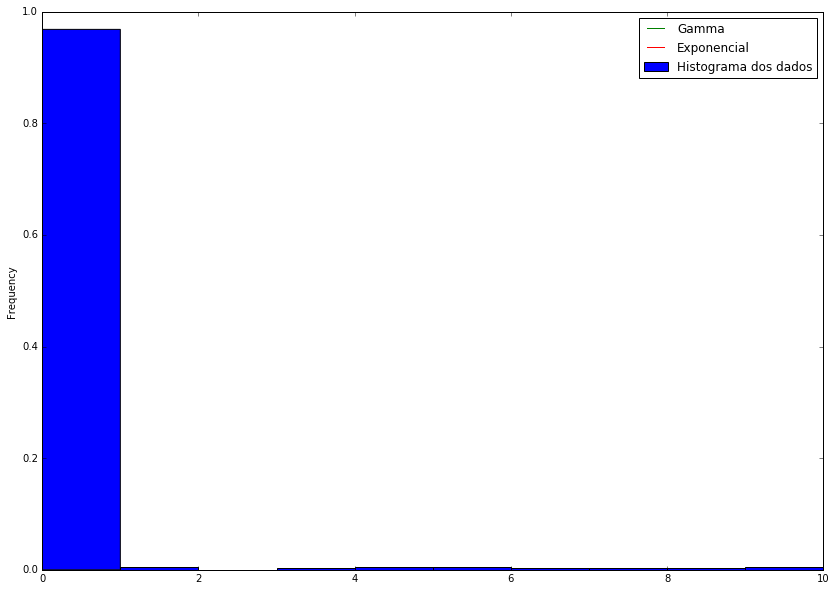

In [11]:
mu_exp = salario.mean()

# k para a gamma é escolhido entre 1 e 2 baseado na forma do histograma e no efeito que k tem na forma da gamma
k_gamma = 1.65

# Estimamos theta da distribuição gamma
theta_gamma = salario.mean()/k_gamma


x = np.linspace(0, 10, 1000)

fig = plt.figure(figsize=(14,10))


# histograma e densidade teórica
salario.plot.hist(bins=range(0, 11), normed=True, label="Histograma dos dados")
exponencial = stats.expon.pdf(x, scale=mu_exp)
gamma = stats.gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma)


plt.plot(x, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.plot(x, exponencial, '-', color='red', label="Exponencial") # Plota a exponencial teórica

plt.legend()


In [12]:
stats.gamma.fit(salario)


array([  9.09507013e-11,   1.91539246e-10,   3.24533790e-08, ...,
         3.47481022e-06,   3.47481022e-06,   3.30129770e-06])

In [ ]:
# dados ordenados e quantis teóricos - QQplot

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(salario)):
    acc = (i - 0.5) / len(salario)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_exp = stats.expon.ppf(fra, scale=mu_exp) # quantis teóricos da exponencial
q_gamma = stats.gamma.ppf(fra, scale=theta_gamma, loc=0, a=k_gamma)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

exp_plot, = plt.plot(salario, q_exp, 'o', color="red", label="Exponencial")
gamma_plot, = plt.plot(salario, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[exp_plot, gamma_plot])
plt.plot((min(salario), max(salario)), (min(salario), max(salario)), '-')


for i in range(len(salario)):
    plt.plot((salario[i], salario[i]), (q_exp[i], salario[i]), '-', color='red', alpha=0.3  )
    plt.plot((salario[i], salario[i]), (q_gamma[i], salario[i]), '-', color='green', alpha=0.3  )


Kelly não consegui fazer a parte a partir das curvas de comparação! Vou entregar assim mesmo, mas semana que vem eu vou refazê-lo, tive muito azar por ter ficado doente e não ter ido hoje ter tirado as dúvidas. Terça eu te pergunto disso e dos exercícios para a prova! 

___
### Itens 7 a 9 - Resolução:

___
### Itens 10 e 11 - Resolução: